[SAMPLE CODE]
# Pythonプログラムの基本：H2Oai OSSによる回帰モデル
http://docs.h2o.ai/h2o/latest-stable/h2o-docs/downloading.html#install-in-python

このサンプルコードでは、次のことができます
- データセット（CSVファイル）の読み込み
- H2Oaiによる機械学習モデルの生成
- 機械学習モデルを使った予測
- 機械学習モデルの保存

In [1]:
import pandas as pd
import numpy as np

import h2o
from h2o.automl import H2OAutoML

import matplotlib.pyplot as plt
import japanize_matplotlib

import seaborn as sns

/Users/hiroyasu.komaki/.pyenv/versions/3.7.4/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


#### 環境PATH

In [2]:
csv_path = 'csv/'
model_path = 'model/'

fname = 'dts_kisho'

## データセットの読み込み

In [3]:
# 訓練データ
df_train = pd.read_csv(csv_path + fname +'.csv')
df_train.shape

(647, 11)

In [4]:
df_train.head()

,city,hiduke8,hiduke,avg_temp_c,max_temp_c,min_temp_c,rain_mm,sunlight_hour,snow_cm,wind_ms,wind_direction
0,東京都,20180101,2018-01-01,6.2,13.0,0.4,0.0,8.4,0.0,5.5,北西
1,東京都,20180102,2018-01-02,6.1,10.8,0.8,0.0,8.9,0.0,6.1,北西
2,東京都,20180103,2018-01-03,4.9,8.6,2.3,0.0,8.9,0.0,9.9,西北西
3,東京都,20180104,2018-01-04,4.7,9.6,0.0,0.0,8.8,0.0,5.4,北西
4,東京都,20180105,2018-01-05,3.7,6.3,0.8,0.0,0.1,0.0,3.8,北北西


In [5]:
print(df_train['hiduke'].min())
print(df_train['hiduke'].max())

2018-01-01
2019-10-09


## データ前処理

In [6]:
# 　学習に合わせてデータ前処理を行う

In [7]:
for index, row in df_train.iterrows():
    s = str(row['hiduke8'])
    df_train.at[index, 'hiduke6'] = s[0:6]

## 機械学習（AutoML）

- [AutoML](https://docs.h2o.ai/h2o/latest-stable/h2o-docs/automl.html)
- [AutoML Modelling](http://docs.h2o.ai/h2o/latest-stable/h2o-py/docs/modeling.html#h2oautoml)

#### H2Oaiの起動

In [8]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "13.0.2" 2020-01-14; OpenJDK Runtime Environment (build 13.0.2+8); OpenJDK 64-Bit Server VM (build 13.0.2+8, mixed mode, sharing)
  Starting server from /Users/hiroyasu.komaki/.pyenv/versions/3.7.4/lib/python3.7/site-packages/h2o/backend/bin/h2o.jar
  Ice root: /var/folders/cr/k_wktw_j2pv6tbndmc83x92r0000gp/T/tmpr18c5ynx
  JVM stdout: /var/folders/cr/k_wktw_j2pv6tbndmc83x92r0000gp/T/tmpr18c5ynx/h2o_hiroyasu_komaki_started_from_python.out
  JVM stderr: /var/folders/cr/k_wktw_j2pv6tbndmc83x92r0000gp/T/tmpr18c5ynx/h2o_hiroyasu_komaki_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,01 secs
H2O_cluster_timezone:,Asia/Tokyo
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.1
H2O_cluster_version_age:,1 month and 13 days
H2O_cluster_name:,H2O_from_python_hiroyasu_komaki_gqym1d
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,4 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"accepting new members, healthy"


#### （H2Oai用）Dataset生成

In [9]:
train = h2o.H2OFrame(df_train[df_train['hiduke'] < '2019-09-01'])
train.shape

Parse progress: |█████████████████████████████████████████████████████████| 100%


(608, 12)

In [10]:
test = h2o.H2OFrame(df_train[df_train['hiduke'] >= '2019-09-01'])
test.shape

Parse progress: |█████████████████████████████████████████████████████████| 100%


(39, 12)

In [11]:
# Identify predictors and response
x = train.columns
y = "max_temp_c"
x.remove(y)

#### 機械学習モデルの生成

In [12]:
aml_rg = H2OAutoML(max_models=10, seed=1)
aml_rg.train(x = x, y = y, training_frame=train)

AutoML progress: |████████████████████████████████████████████████████████| 100%


In [13]:
# 学習結果の表示
lb_rg = aml_rg.leaderboard
lb_rg

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20200517_160748,1.02629,1.01306,1.02629,0.768605,nan
StackedEnsemble_AllModels_AutoML_20200517_160748,1.02691,1.01337,1.02691,0.771349,0.115988
GBM_1_AutoML_20200517_160748,1.06715,1.03303,1.06715,0.796227,0.0656359
GBM_2_AutoML_20200517_160748,1.2083,1.09923,1.2083,0.848999,0.0686331
GBM_4_AutoML_20200517_160748,1.3654,1.1685,1.3654,0.90099,0.071477
GBM_3_AutoML_20200517_160748,1.42144,1.19224,1.42144,0.918334,0.0733221
XGBoost_2_AutoML_20200517_160748,1.49129,1.22118,1.49129,0.948649,0.0782381
XGBoost_1_AutoML_20200517_160748,1.49215,1.22154,1.49215,0.968686,0.0763807
XGBoost_3_AutoML_20200517_160748,1.52146,1.23347,1.52146,0.960917,0.0755721
DRF_1_AutoML_20200517_160748,1.69821,1.30315,1.69821,0.988511,0.0865954


In [14]:
# 学習済みモデルの決定
model = aml_rg.leader
print(model.model_id)

StackedEnsemble_BestOfFamily_AutoML_20200517_160748


## 学習済みモデルでの予測実行

In [15]:
#prediction
pred = model.predict(test)

stackedensemble prediction progress: |████████████████████████████████████| 100%


In [16]:
test['predict'] = pred['predict']

In [17]:
train['predict'] = train['max_temp_c']
df_result = train.rbind(test).as_data_frame()
df_result.shape

(647, 13)

## 予測結果の図示

In [18]:
# Actual
df_a = df_result.groupby(['hiduke6'])['max_temp_c'].max().reset_index()
df_a = df_a.sort_values('hiduke6', ascending=True)

In [19]:
# Predict
df_b = df_result.groupby(['hiduke6'])['predict'].max().reset_index()
df_b = df_b.sort_values('hiduke6', ascending=True)

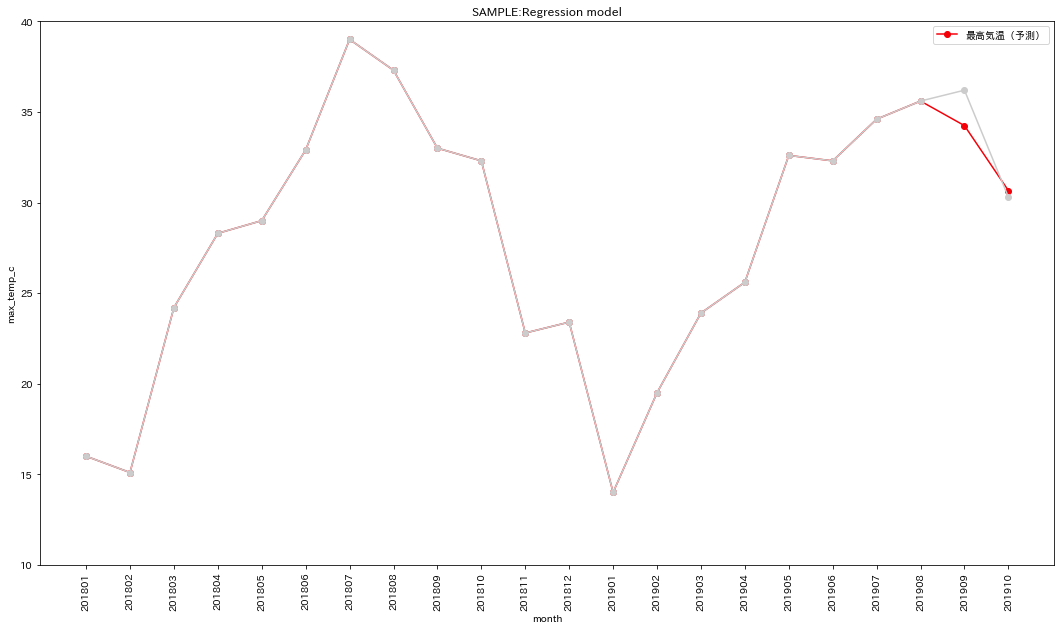

In [20]:
fig = plt.figure(figsize=(40,10))
fig.add_subplot(1,2,1)

# 図表（一軸）
ax1 = plt.gca()

data_num = len(df_a)
ax1.plot(df_b["predict"], color = "#F40009", alpha = 1, marker="o")
ax1.plot(df_a["max_temp_c"], color = "0.8", alpha = 1, marker="o")

ax1.set_xticks(range(data_num))
ax1.set_xticklabels(df_a["hiduke6"].tolist(), rotation=90)

ax1.set_xlabel("month")
ax1.set_ylabel("max_temp_c")

ax1.set_ylim(10, 40)

# 凡例
ax1.legend(['最高気温（予測）'])

# 図表を表示する
ax1.set_title("SAMPLE:Regression model")

plt.show()

## 学習済みモデルの保存
http://docs.h2o.ai/h2o/latest-stable/h2o-docs/save-and-load-model.html

In [21]:
# save the model
model_path = h2o.save_model(model=model, path=model_path, force=True)
print(model_path)

/Users/hiroyasu.komaki/h2oai-bigdata-pilot/sample_code/h2oai/model/StackedEnsemble_BestOfFamily_AutoML_20200517_160748
